In [6]:
import gmaps
import gmaps.datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
sns.set_style("darkgrid")

In [8]:
def read_json(filename):
    datafile = open(filename, 'r',  encoding='utf-8')
    return json.loads(datafile.read())

In [20]:
data = read_json('covid-sg.json')

In [26]:
list_pro = []
for dic in data['features']:
    list_pro.append(dic['properties'])

In [28]:
covid = pd.DataFrame(list_pro)

In [248]:
gen = covid[(covid.gender == 'Male') | (covid.gender== 'Female')]['gender'].value_counts()

In [64]:
covid[(covid.gender == 'Male') | (covid.gender== 'Female')]

,id,title,confirmed,discharged,hospital,source,nationality,residenceAreas,placesVisited,age,death,transmissionSource,gender,linkedClusters
0,case-1,Case 1,2020-01-23,2020-02-19,Singapore General Hospital,https://www.straitstimes.com/singapore/health/...,Chinese,[Shangri-La Rasa Sentosa Resort & Spa],[],66,,Imported,Male,[]
1,case-2,Case 2,2020-01-24,2020-02-07,National Centre for Infectious Diseases,https://www.straitstimes.com/singapore/health/...,Chinese,"[J8 hotel, 8 Townshend Road]","[Raffles Hospital, Tan Tock Seng Emergency Dep...",53,,Imported,Female,[]
2,case-3,Case 3,2020-01-24,2020-02-21,Singapore General Hospital,https://www.straitstimes.com/singapore/health/...,Chinese,[],[],37,,Imported,Male,[]
3,case-4,Case 4,2020-01-25,2020-02-12,Sengkang General Hospital,https://www.moh.gov.sg/news-highlights/details...,Chinese,[Village Hotel Sentosa],"[USS, Vivocity]",36,,Imported,Male,[]
4,case-5,Case 5,2020-01-27,2020-02-18,National Centre for Infectious Diseases,https://www.moh.gov.sg/news-highlights/details...,Chinese,[Ceylon Road],[Tan Tock Seng Hospital],56,,Imported,Female,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6585,case-6586,Case 6586,2020-04-19,,National Centre for Infectious Diseases,https://www.channelnewsasia.com/news/singapore...,Bangladeshi (Work Permit holder),[],[],35,,Local,Male,[]
6586,case-6587,Case 6587,2020-04-19,,National Centre for Infectious Diseases,https://www.channelnewsasia.com/news/singapore...,Singapore Citizen,[],[],54,,Local,Male,[]
6587,case-6588,Case 6588,2020-04-19,,National Centre for Infectious Diseases,https://www.channelnewsasia.com/news/singapore...,Bangladeshi (S Pass holder),[],[],47,,Local,Male,[]
9681,case-9682,Case 9682,2020-04-22,,,https://www.channelnewsasia.com/news/singapore...,,[],[],81,2020-04-27,,Male,[]


Text(0.5, 1.0, 'Gender')

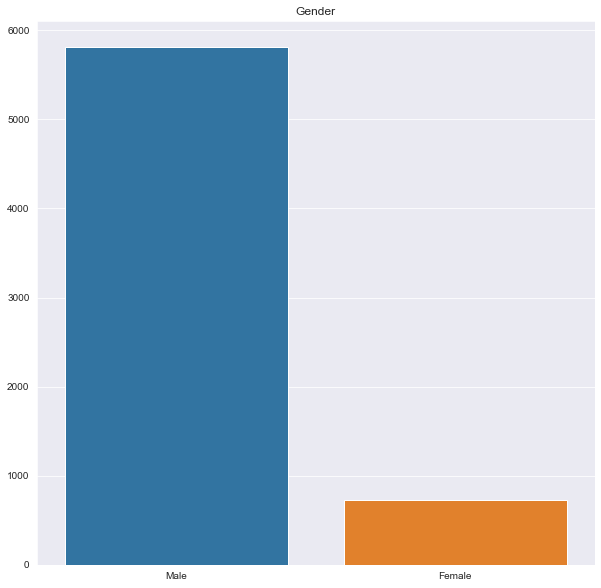

In [250]:
plt.figure(figsize=(10,10))
sns.barplot(x= gen.index,y = gen.values)
plt.title("Gender")

In [241]:
covid.confirmed.value_counts()

2020-04-20    1426
2020-04-17    1207
2020-04-21    1111
2020-04-23    1037
2020-04-22    1016
              ... 
2020-02-27       2
2020-02-01       1
2020-02-23       1
2020-01-23       1
2020-01-25       1
Name: confirmed, Length: 91, dtype: int64

Text(0.5, 1.0, 'Number of confirmed cases per day')

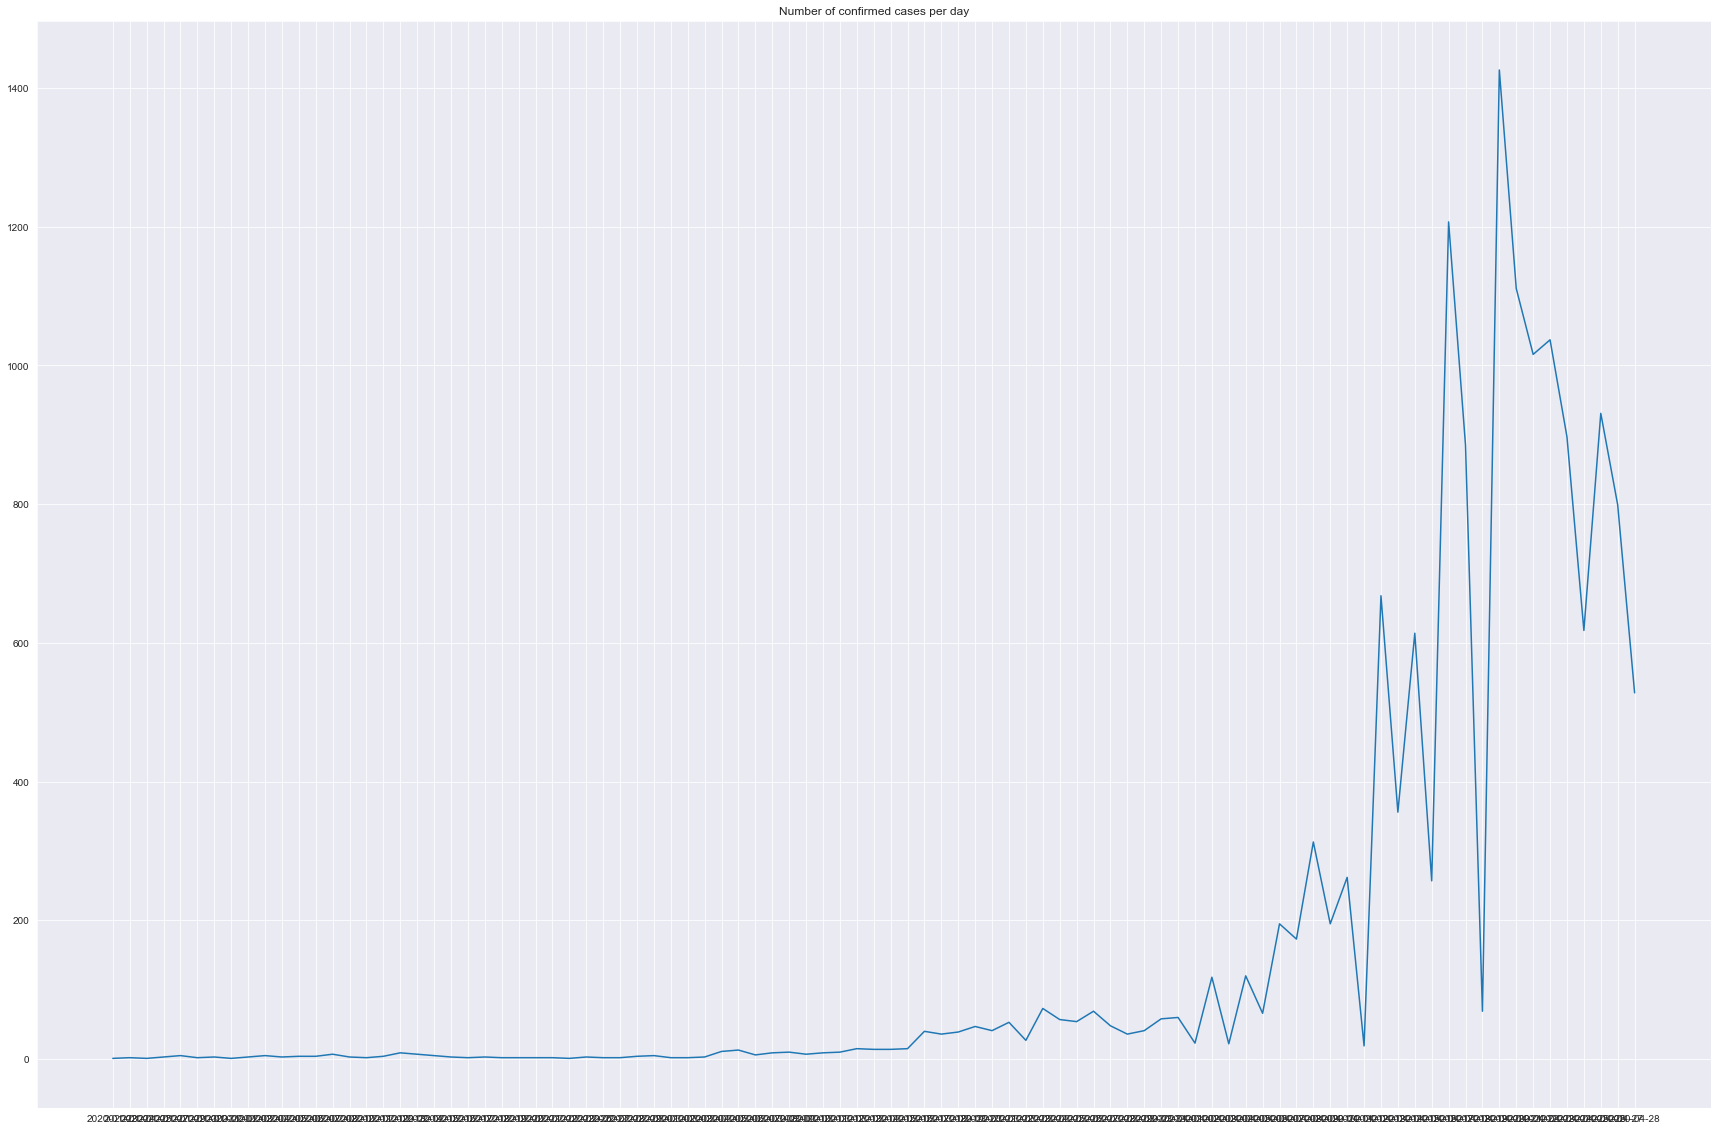

In [251]:
plt.figure(figsize=(30,20))
sns.lineplot(data=covid[covid.confirmed != ''].confirmed.value_counts())
plt.title("Number of confirmed cases per day")

In [244]:
covid[covid.discharged != ''].discharged.value_counts().sort_index()

#Last updated : 2020-04-28

2020-02-04     1
2020-02-07     1
2020-02-09     4
2020-02-10     1
2020-02-11     2
              ..
2020-04-24    38
2020-04-25    46
2020-04-26    58
2020-04-27    35
2020-04-28    33
Name: discharged, Length: 77, dtype: int64

Text(0.5, 1.0, 'Number of discharged cases per day')

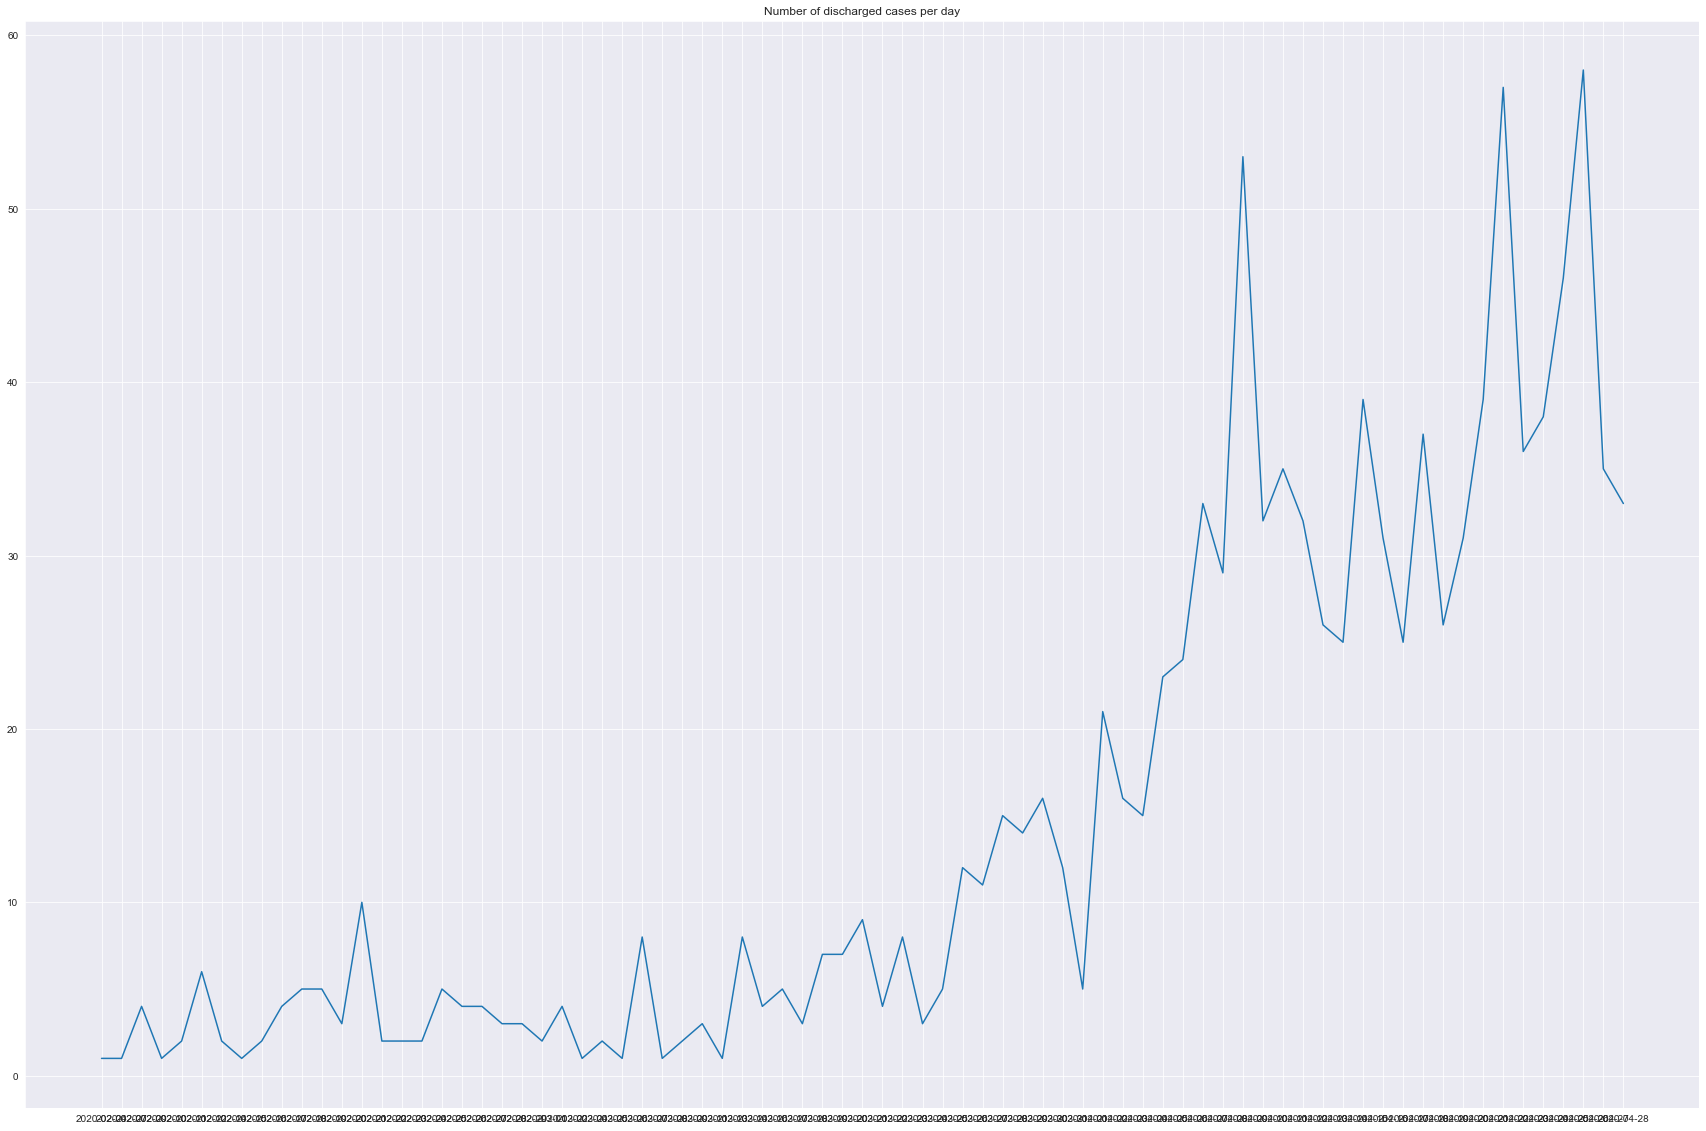

In [238]:
plt.figure(figsize=(30,20))
sns.lineplot(data=covid[covid.discharged != ''].discharged.value_counts())
plt.title("Number of discharged cases per day")

In [226]:
def temp(row):
    if row.age > 70:
        return "age > 70"
    elif row.age >50:
        return "50 < age < 70 "
    else:
        return "age < 50"
    
age_death = covid[covid.death != ''].apply(temp, axis='columns').value_counts()

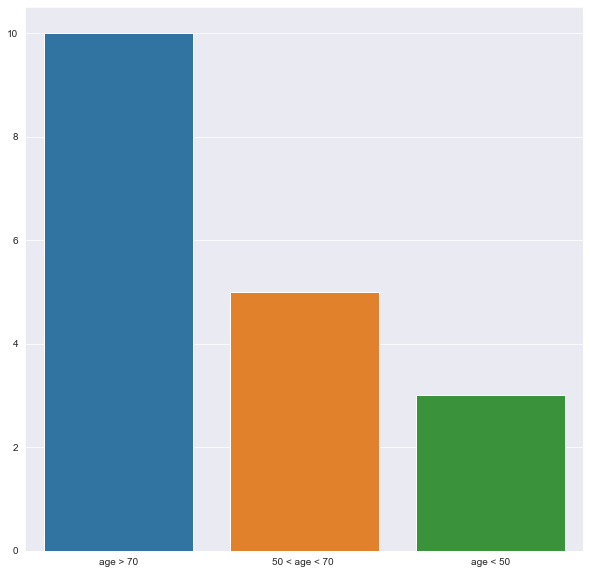

In [390]:
plt.figure(figsize=(10,10))
sns.barplot(age_death.index,y = age_death.values)

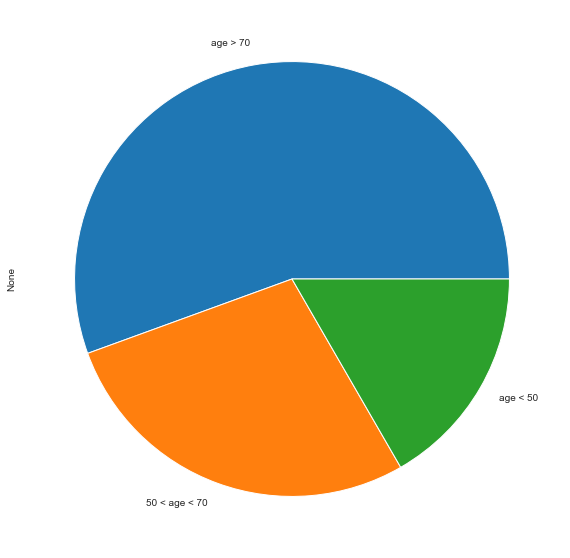

In [391]:
age_death.plot.pie(y='values', figsize=(10, 10))

In [375]:
nationality_extract = covid[covid.nationality != ''].nationality.value_counts()


In [368]:
761 + 87 + 77

925

In [376]:
nationality_extract = nationality_extract[:9]

In [379]:
nationality_extract['Other'] = 925

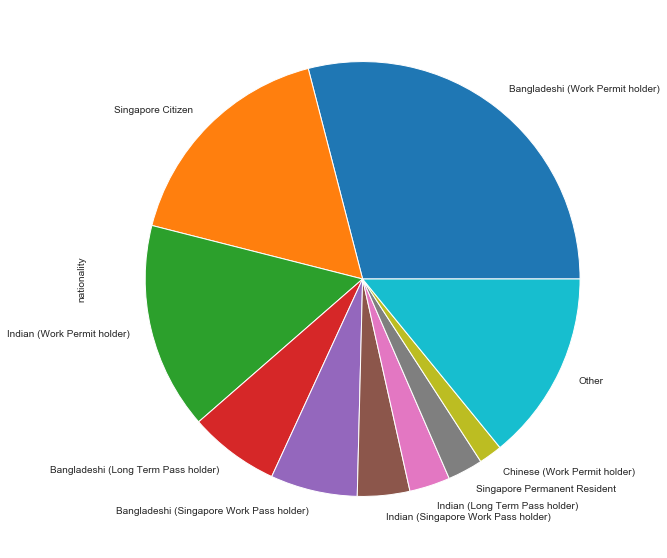

In [387]:
nationality_extract
nationality_extract.plot.pie(y='values', figsize=(10, 10))

In [179]:
covid[covid.nationality != ''].nationality.value_counts().sum()

6553

In [194]:
transmission_extract= covid[covid.transmissionSource != ''].transmissionSource.value_counts()

Text(0.5, 1.0, 'Transmission Source')

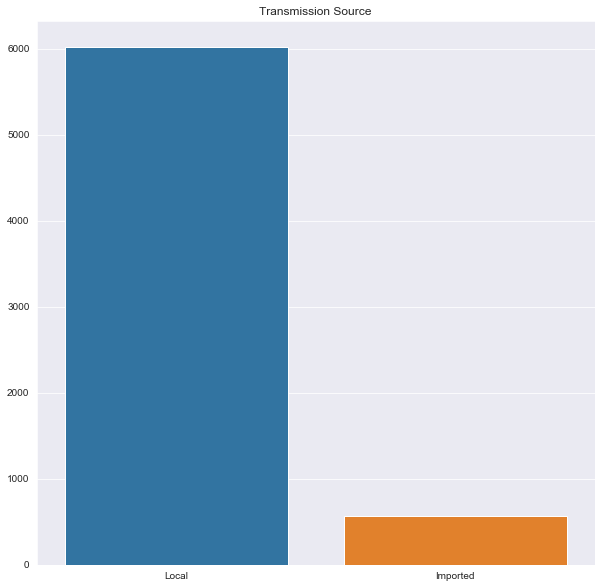

In [198]:
plt.figure(figsize=(10,10))
sns.barplot(x=transmission_extract.index,y = transmission_extract.values)
plt.title("Transmission Source")

In [253]:
covid

,id,title,confirmed,discharged,hospital,nationality,residenceAreas,placesVisited,age,death,transmissionSource,gender,linkedClusters
0,case-1,Case 1,2020-01-23,2020-02-19,Singapore General Hospital,Chinese,[Shangri-La Rasa Sentosa Resort & Spa],[],66,,Imported,Male,[]
1,case-2,Case 2,2020-01-24,2020-02-07,National Centre for Infectious Diseases,Chinese,"[J8 hotel, 8 Townshend Road]","[Raffles Hospital, Tan Tock Seng Emergency Dep...",53,,Imported,Female,[]
2,case-3,Case 3,2020-01-24,2020-02-21,Singapore General Hospital,Chinese,[],[],37,,Imported,Male,[]
3,case-4,Case 4,2020-01-25,2020-02-12,Sengkang General Hospital,Chinese,[Village Hotel Sentosa],"[USS, Vivocity]",36,,Imported,Male,[]
4,case-5,Case 5,2020-01-27,2020-02-18,National Centre for Infectious Diseases,Chinese,[Ceylon Road],[Tan Tock Seng Hospital],56,,Imported,Female,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,case-14947,Case 14947,2020-04-28,,,,[],[],,,,,[]
14947,case-14948,Case 14948,2020-04-28,,,,[],[],,,,,[]
14948,case-14949,Case 14949,2020-04-28,,,,[],[],,,,,[]
14949,case-14950,Case 14950,2020-04-28,,,,[],[],,,,,[]


In [258]:
covid[covid.hospital != ''].hospital.value_counts()

National Centre for Infectious Diseases    1983
0                                          1716
National University Hospital                585
Khoo Teck Puat Hospital                     461
Singapore Expo and MAX Atria (CIF)          444
Ng Teng Fong General Hospital               392
Singapore General Hospital                  349
Changi General Hospital                     279
Sengkang General Hospital                   225
Alexandra Hospital                           58
KK Women's and Children's Hospital           43
TTSH                                         20
KK Women’s and Children’s Hospital           12
Mount Elizabeth Hospital                      4
Mount Alvernia Hospital                       3
 Singapore General Hospital                   3
Parkway East Hospital                         3
Gleneagles Hospital                           2
MEN                                           2
Sengkang Hospital                             1
Tan Tock Seng Hospital                  

In [9]:
data = read_json('locations.json')

In [10]:
data['features'][0]['properties']['type']

'cluster'

In [11]:
locations_cluster = []
weights_cluster =[]
locations_hospital = []
weights_hospital =[]
for dic in data['features']:
    if dic['properties']['type'] == 'cluster':
        locations_cluster.append(tuple(dic['geometry']['coordinates'][0][0][::-1]))
        if 'caseCount' in dic['properties']:
               weights_cluster.append(((dic['properties']['caseCount'])))
        else:
               weights_cluster.append((len(dic['properties']['cases'])))
    if dic['properties']['type'] == 'hospital':
        locations_hospital.append(tuple(dic['geometry']['coordinates'][0][0]))
        weights_hospital.append(float(len(dic['properties']['cases'])))
        

In [12]:
weights_cluster

[23,
 23,
 9,
 10,
 3,
 5,
 14,
 45,
 6,
 5,
 3,
 27,
 11,
 8,
 4,
 2302,
 10,
 9,
 203,
 13,
 7,
 114,
 6,
 8,
 5,
 6,
 82,
 901,
 131,
 283,
 5,
 90,
 210,
 323,
 5,
 108,
 210,
 167,
 107,
 5,
 30,
 31,
 313,
 72,
 101,
 896,
 40,
 44,
 8,
 79,
 7,
 7,
 7,
 12,
 13,
 118,
 89,
 202,
 28,
 176,
 8,
 303,
 47,
 144,
 230,
 123,
 8,
 95,
 98,
 237,
 68,
 136,
 74,
 26,
 281,
 300,
 17,
 46,
 133,
 100,
 148,
 15,
 62,
 57,
 23,
 17,
 133,
 33,
 16,
 61,
 96,
 60,
 14,
 12,
 323,
 203,
 91,
 46,
 32,
 71,
 23,
 27,
 6,
 5,
 6,
 102,
 68,
 27,
 15,
 78,
 7,
 58,
 23,
 24,
 31,
 22,
 29,
 64,
 4,
 15,
 6,
 4,
 8,
 11,
 9,
 22,
 68,
 19,
 15,
 16]

In [13]:
locations_cluster

[(1.2942341, 103.8162054),
 (1.3649022, 103.7472061),
 (1.3109204, 103.8616363),
 (1.327888, 103.8906279),
 (1.30679, 103.8331),
 (1.406049, 103.864784),
 (1.2884919, 103.7789882),
 (1.3347785, 103.7056551),
 (1.3106196, 103.8631139),
 (1.3445999, 103.7755481),
 (1.3705046, 103.8458113),
 (1.3281944, 103.9384597),
 (1.30674, 103.778623),
 (1.3190448, 103.8933889),
 (1.4375866, 103.8415606),
 (1.416786, 103.895337),
 (1.332753, 103.787398),
 (1.286358, 103.848909),
 (1.3365402, 103.7512038),
 (1.3305125, 103.8394219),
 (1.409748, 103.74348),
 (1.3103732, 103.854922),
 (1.2801398, 103.8427344),
 (1.3016827, 103.649821),
 (1.2842924, 103.8607721),
 (1.2891531, 103.8517852),
 (1.2839472, 103.8496109),
 (1.3785975, 103.7168933),
 (1.3380759, 103.7520908),
 (1.4612032, 103.8172741),
 (1.3168435, 103.8940056),
 (1.3667094, 103.9284585),
 (1.4600462, 103.8190869),
 (1.4317819, 103.7588166),
 (1.2851428, 103.8514774),
 (1.3369676, 103.8836988),
 (1.4070668, 103.7532526),
 (1.4561891, 103.797040

In [14]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations = locations_cluster, weights = weights_cluster)
fig.add_layer(heat_layer)
heat_layer.max_intensity = 150
heat_layer.point_radius = 7
print('Clusters in Singpore')
fig

Clusters in Singpore


Figure(layout=FigureLayout(height='420px'))

In [326]:
list_pro = []
for dic in data['features']:
    list_pro.append(dic['properties'])

In [325]:
loca_data = pd.DataFrame(list_pro)


In [353]:
loca_data.type.value_counts()


cluster     130
hospital     16
other         2
Name: type, dtype: int64

In [354]:
loca_data[loca_data.type == 'other']

,location,type,cases,caseCount,isDorm
130,Mei Hwan Drive,other,"[50, 55, 65, 66, 68, 70, 71, 80, 83, 84, 88, 91]",NaN,False
131,Changi Airport (Imported Cases),other,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",NaN,False


In [347]:
loca_data[pd.notnull(loca_data.caseCount)].sort_values(by='caseCount', ascending = False)

,location,type,cases,caseCount,isDorm
15,S11 Dormitory @ Punggol (2 Seletar North Link),cluster,"[826, 829, 852, 860, 946, 947, 966, 979, 982, ...",2302.0,True
27,Sungei Tengah Lodge (500 Old Choa Chu Kang Road),cluster,"[1054, 1077, 1124, 1267, 1306, 1319, 1342, 136...",901.0,False
45,Tuas View Dormitory (70 Tuas South Avenue 1),cluster,"[1473, 1539, 1996, 2071, 2134, 2242, 2329, 233...",896.0,True
94,Hulett Dormitory (20 Senoko Drive),cluster,[],323.0,True
33,Kranji Lodge I (12 Kranji Road),cluster,"[880, 1190, 1241, 1506, 1519, 1520, 1630, 2141...",323.0,False
...,...,...,...,...,...
120,Hai Leck Engineering Pte Ltd (12 Tuas Drive 1),cluster,[],6.0,False
102,Natureland East Coast (907 East Coast Road),cluster,[],6.0,False
103,Strand Hotel (25 Bencoolen Street),cluster,[],5.0,False
121,Lingjack Dormitory (1 Woodlands Terrace),cluster,[],4.0,True


In [346]:
def find_dorm(row):
    if 'Dormitory' in row.location:
        return True
    else: 
        return False
loca_data['isDorm'] = loca_data.apply(lambda x: find_dorm(x),axis=1)

In [350]:
loca_data[loca_data.isDorm == True]

,location,type,cases,caseCount,isDorm
15,S11 Dormitory @ Punggol (2 Seletar North Link),cluster,"[826, 829, 852, 860, 946, 947, 966, 979, 982, ...",2302.0,True
20,Dormitory at 55 Sungei Kadut Loop,cluster,"[868, 972, 974, 1356, 1510, 1549, 2085]",NaN,True
28,Toh Guan Dormitory (19A Toh Guan Road East),cluster,"[963, 1079, 1106, 1148, 1150, 1195, 1254, 1262...",131.0,True
31,Tampines Dormitory (2 Tampines Place),cluster,"[1049, 1140, 1193, 1226, 1299, 1261, 1313, 131...",90.0,True
36,Dormitory at 31 Sungei Kadut Avenue,cluster,"[1549, 1731, 1735, 1830, 1831, 2209, 2245, 236...",210.0,True
45,Tuas View Dormitory (70 Tuas South Avenue 1),cluster,"[1473, 1539, 1996, 2071, 2134, 2242, 2329, 233...",896.0,True
47,85 Kallang Dormitory (85 Kallang Avenue),cluster,"[1585, 2059, 2062, 2097, 2172, 4742, 5445, 5466]",44.0,True
56,Kranji Dormitory (17 Kranji Way),cluster,"[2247, 2248, 2250, 2390, 2398, 2399, 3203, 328...",89.0,True
58,10 Kian Teck Crescent Dormitory,cluster,"[1125, 1540, 1959, 2929, 3824, 5926]",28.0,True
59,Kian Teck Dormitory (26 Kian Teck Avenue),cluster,"[2955, 2956, 3370, 4171, 4658, 5447, 5547, 6411]",176.0,True


In [404]:
locations = read_json('covid-sg.json')

In [405]:
fig = gmaps.figure()
geojson = gmaps.geojson_layer(locations)
fig.add_layer(geojson)
print ('Coordinates of the place of residence (other fallback values might include locations such as location of hospitalisation, if the former is not made available)')
fig

Figure(layout=FigureLayout(height='420px'))